<a href="https://colab.research.google.com/github/kartikeyshaurya/Udacity_deep_learning_nanodergree/blob/master/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.1.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)
%pip --no-cache-dir install tfds-nightly

2.2.0


In [5]:
# TODO: Make all necessary imports.
import tensorflow as tf
import tensorflow_hub as hub

# this solution i have found at the udacity official forum 

!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
from PIL import Image
import numpy as np
import pandas as pd
import json

2020-05-14 09:40:06.263363: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
I0514 09:40:08.639637 140470484830080 download_and_prepare.py:201] Running download_and_prepare for dataset(s):
oxford_flowers102
I0514 09:40:08.641343 140470484830080 dataset_info.py:358] Load dataset info from /root/tensorflow_datasets/oxford_flowers102/2.1.1
I0514 09:40:08.649350 140470484830080 download_and_prepare.py:139] download_and_prepare for dataset oxford_flowers102/2.1.1...
I0514 09:40:08.649771 140470484830080 dataset_builder.py:287] Reusing dataset oxford_flowers102 (/root/tensorflow_datasets/oxford_flowers102/2.1.1)
name: "oxford_flowers102"
description: "The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring\nin the United Kingdom. Each class consists of between 40 and 258 images. The images have\nlarge scale, pose and light variations. In addition, there are categories that have large\nvari

In [0]:
#loading the dataset with th help of tfds
dataset, dataset_info = tfds.load("oxford_flowers102",with_info=True,download=True)

# New Section

In [0]:
# splitting it in the training testing and the validation set 
(training_set,  testing_set, validation_set )= (dataset["train"], dataset['test'], dataset['validation'])


In [13]:
# getting the info 
dataset_info.features['label'].num_classes, dataset_info.splits['train'].num_examples

(102, 1020)

In [14]:
# TODO: Get the number of examples in each set from the dataset info.
# number of example in each set from the dataset info .

training_example  = dataset_info.splits["train"].num_examples 
testing_example = dataset_info.splits["test"].num_examples
validation_example =  dataset_info.splits["validation"].num_examples
print("number of image in  the training exaple is " +  str(training_example))
print("number of image in  the testing exaple is " + str(testing_example))
print("number of image in  the validation exaple is " + str(validation_example))


number of image in  the training exaple is 1020
number of image in  the testing exaple is 6149
number of image in  the validation exaple is 1020


In [16]:
# TODO: Get the number of classes in the dataset from the dataset info.
total_classes = dataset_info.features['label'].num_classes
print("number of the classes in the dataset is "+ str(total_classes))

number of the classes in the dataset is 102


In [18]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
count = 0
for image in training_set:
  image, label , shape = image['image'], image['label'], image['image'].shape
  print("image label : {0}  and shape {1} ".format(label, shape) )
  count +=1 
  if(count == 3):
    break ;

image label : 72  and shape (500, 667, 3) 
image label : 84  and shape (500, 666, 3) 
image label : 70  and shape (670, 500, 3) 


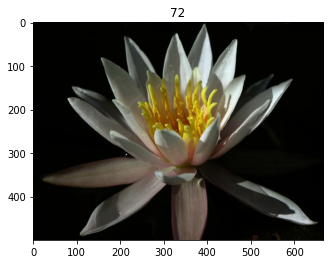

In [21]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label.

for image in training_set:
  image, label = image['image'], image['label']
  plt.imshow(image.numpy())
  plt.title(label.numpy())
  break

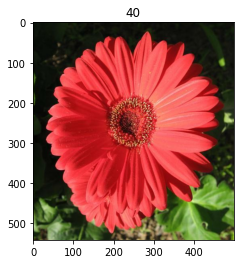

In [28]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label.
for image in testing_set:
  image, label = image['image'], image['label']
  plt.imshow(image.numpy())
  plt.title(label.numpy())
  break

In [0]:
# LABEL MAPPING 
with open('label_map.json', 'r') as f:
    class_names = json.load(f)


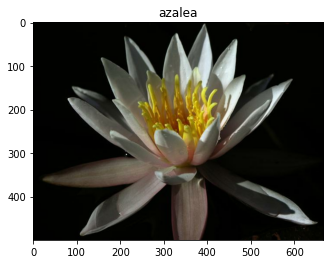

In [34]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name.
# doing in the two part 

for img in training_set:
    image,label = img['image'], img['label']
    plt.imshow(image.numpy())
    plt.title(class_names[str(label.numpy())])

# but the azelea is different flowers hence  something is  wrong with the labelling


In [45]:
#checking what's wrong 
print(class_names)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [0]:
# indexing is wrong in the file json, hence creating a new labelled file
# and for labelling dict is best way to go 
NewClassName = {}
for value in class_names:
  NewClassName[str(int(value)-1)] = class_names[value]

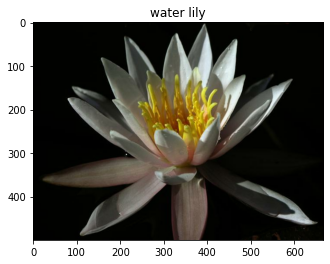

In [43]:
for img in training_set:
    image,label = img['image'], img['label']
    plt.imshow(image.numpy())
    plt.title(NewClassName[str(label.numpy())])
    break
    

**BUILDING AND THE TRAINING THE CLASSIFIER**


*   Load the MobileNet pre-trained network from TensorFlow Hub.
*   Define a new, untrained feed-forward network as a classifier.
*   Train the classifier.
Plot the loss and accuracy values achieved during training for the training and validation set.
Save your trained model as a Keras model.

* Save the pretrained models as Keras models



In [0]:
# TODO: Create a pipeline for each set.

In [0]:
# TODO: Build and train your network.
#imported hub 
# psrtislly took code from https://www.tensorflow.org/hub   first code 

def model():
  mobilenet_class_map_file = "download.tensorflow.org/data/ImageNetLabels.txt"
  feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 
  feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=(224,224,3))
  feature_extractor_layer.trainable = False
  model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(600, activation="relu"),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(300, activations = "relu"),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(num_classes, activation='softmax') 

  ])

  print(model.summary())
  
  return model


In [0]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

In [0]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

In [0]:
# TODO: Save your trained model as a Keras model.

In [0]:
# TODO: Load the Keras model

In [0]:
# TODO: Create the process_image function

In [0]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [0]:
# TODO: Create the predict function


In [0]:
# TODO: Plot the input image along with the top 5 classes
